**os:** İşletim sistemi işlevlerini kullanmak için.
**glob:** Dosya yollarını eşleştirmek için kullanılır.
**fnmatch:** Dosya adlarını eşleştirmek için kullanılır.
**pandas:** Veri manipülasyonu ve analizi için kullanılan bir kütüphane.
**numpy:** Dizi ve matris işlemleri için 
kullanılır.
**librosa:** Ses işleme için kullanılan bir kütüphane.
**librosa.display:** Ses verilerini görselleştirmek için kullanılan bir modül.
matplotlib.pyplot: Grafikler oluşturmak ve görselleştirmek için kullanılan bir kütüphane.
**IPython.display: **IPython ortamında ses dosyalarını çalmak veya göstermek için kullanılır.
**math:** Matematiksel işlemler için kullanılan bir kütüphane.
**tensorflow:** Makine öğrenimi modelleri oluşturmak ve eğitmek için kullanılan bir kütüphane.

*Bu kütüphaneler, ses dosyalarının yüklenmesi, ses verilerinin önişleme adımlarının gerçekleştirilmesi ve modelin eğitimi gibi işlemleri gerçekleştirmek için kullanılır.*





In [1]:
import os
import glob
import fnmatch
import pandas as pd
import numpy as np
import librosa #To deal with Audio files
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd
import math
import tensorflow as tf

In [2]:
#colab- drive bağlantısını yap
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


**data_path:** Ses dosyalarının bulunduğu dizin yolunu temsil eder. 
**os.listdir()** işlevi bu dizin yolunu kullanarak dosya ve klasörlerin listesini döndürecektir.

In [3]:
data_path = "/content/drive/MyDrive/Colab Notebooks/YZ_Uygulamaları/Heartbeat_Sound"
print(os.listdir(data_path))

['extrastole', 'artifact', 'murmur', 'extrahls', 'normal', 'unlabel']


In [4]:
tarin_data      = data_path 
unlabel_data        = data_path  + "/unlabel/"

normal_data     = tarin_data + '/normal/'
murmur_data     = tarin_data + '/murmur/'
extrastole_data = tarin_data + '/extrastole/'
artifact_data   = tarin_data + '/artifact/'
extrahls_data   = tarin_data + "/extrahls/"


**os.listdir(directory): **Belirtilen directory dizinindeki dosya ve klasörlerin isimlerini içeren bir liste döndürür.
**len(sequence):** Belirtilen sequence (liste, dize vb.) nesnesinin uzunluğunu (eleman sayısını) döndürür.
*Bu kod ile her bir ses kategorisinin eğitim veri setinde bulunan dosya sayısı ve toplam eğitim seslerinin sayısı elde edilir.*

In [5]:
print("Normal files:", len(os.listdir(normal_data))) 
print("Murmur files:",len(os.listdir(murmur_data))) 
print("Extrastole files", len(os.listdir(extrastole_data))) 
print("Artifact files:",len(os.listdir(artifact_data))) 
print("Extrahls files:",len(os.listdir(extrahls_data))) 

print('TOTAL TRAIN SOUNDS:', len(os.listdir(normal_data)) 
                              + len(os.listdir(murmur_data))
                              + len(os.listdir(extrastole_data))
                              + len(os.listdir(artifact_data))
                              + len(os.listdir(extrahls_data)))

Normal files: 351
Murmur files: 129
Extrastole files 46
Artifact files: 40
Extrahls files: 19
TOTAL TRAIN SOUNDS: 585


In [6]:
print("Test sounds: ", len(os.listdir(unlabel_data)))

Test sounds:  247


*Bu kod bloğu, her bir ses kategorisinin eğitim veri setindeki dosya sayısını kullanarak bir pasta grafiği oluşturur ve bu grafiği matplotlib kütüphanesi aracılığıyla görselleştirir.*

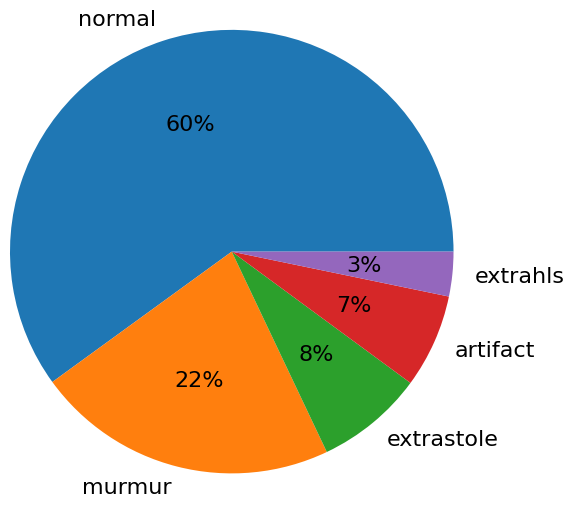

In [7]:
x = np.array([len(os.listdir(normal_data)),
              len(os.listdir(murmur_data)),
              len(os.listdir(extrastole_data)),
              len(os.listdir(artifact_data)),
              len(os.listdir(extrahls_data))])
labels = ['normal', 'murmur', 'extrastole', 'artifact', 'extrahls']
plt.pie(x, labels = labels, autopct = '%.0f%%', radius= 1.5, textprops={'fontsize': 16})
plt.show()

*Bu kod bloğu, ses kategorilerini basit bir şekilde kodlama işlemi gerçekleştirir. Kategoriler, sadece 3 tipe dönüştürülür:*


*   Normal (extrahls ve extrastole dahil)
*   Murmur
*   Artifact

**sklearn.model_selection.train_test_split **ve **sklearn.preprocessing** modülleri içe aktarılır.
**label_to_int** adlı bir sözlük oluşturulur. Bu sözlük, sınıf etiketlerini (kategorileri) ilgili tam sayı değerlerine eşler. Örneğin, "artifact" etiketi 0'a, "murmur" etiketi 1'e ve "normal" etiketi 2'ye eşlenir.
**int_to_label **adlı başka bir sözlük oluşturulur. Bu sözlük, tam sayı değerlerini ilgili sınıf etiketlerine eşler. Örneğin, 0 değeri "artifact" etiketiyle ilişkilendirilir, 1 değeri "murmur" etiketiyle ilişkilendirilir ve 2 değeri "normal" etiketiyle ilişkilendirilir.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

CLASSES = ['artifact','murmur','normal']
NB_CLASSES=len(CLASSES)

label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


*Bu kod ile belirli bir klasörden rastgele bir örneğin görselleştirilmesini gerçekleştirir.*


In [9]:
def visulize_random_sample(folder_name):
  random_sample             = np.random.randint(0,len(os.listdir(folder_name)))
  sample_sound              = os.listdir(folder_name)[random_sample]
  sample_address            = folder_name + sample_sound
  sample_sound, sample_rate = librosa.load(sample_address)
  sample_audio              = ipd.Audio(sample_sound, rate=sample_rate)
  return sample_audio

In [10]:
visulize_random_sample(normal_data)

*Bu kod, normal seslerden rastgele bir örneğin seçilip görselleştirilmesini gerçekleştirir.*

In [11]:
random_normal= np.random.randint(0,len(os.listdir(normal_data))) 
normal_sound = os.listdir(normal_data)[random_normal]
normal_sound_address = normal_data+normal_sound
normal_sound_sample,sample_rate = librosa.load(normal_sound_address)
ipd.Audio(normal_sound_sample,rate=sample_rate)

*Normal bir ses örneğinin dalga formunu görselleştirme: *

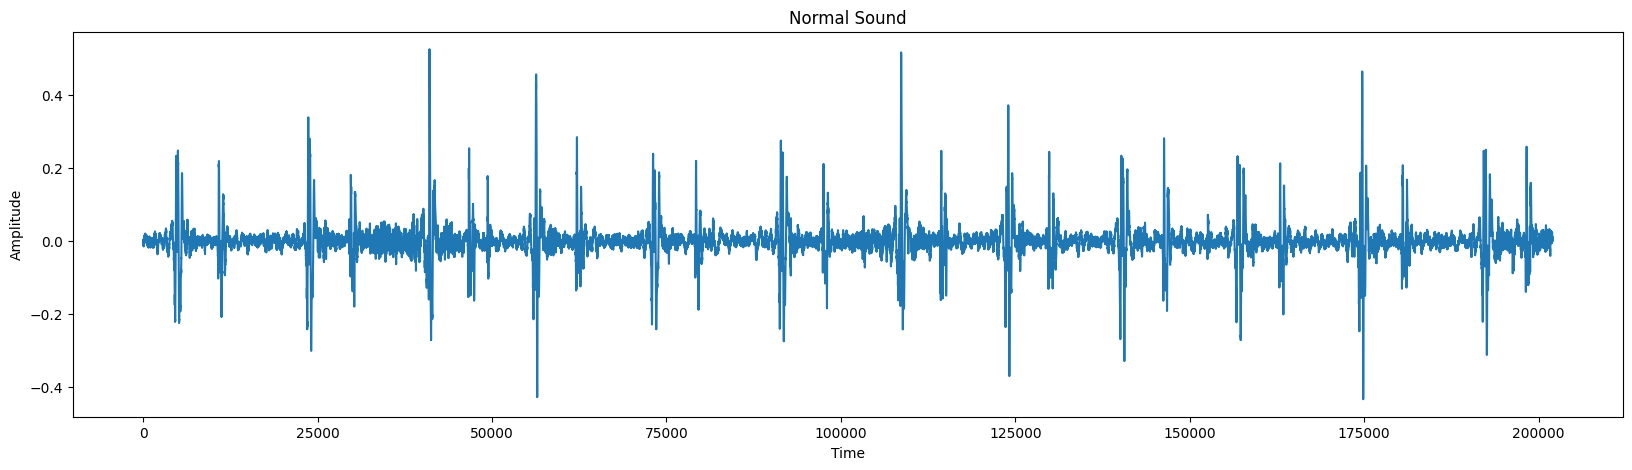

In [12]:
plt.figure(figsize=(20, 5))
plt.plot(normal_sound_sample)
plt.title("Normal Sound")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

Normal bir ses örneğinin frekans spektrumunu görselleştirme:
fft_normal = np.fft.fft

1.   fft_normal = np.fft.fft(normal_sound_sample) ifadesiyle, normal ses örneğinin FFT (Hızlı Fourier Dönüşümü) uygulanarak frekans bileşenlerine ayrıştırılır.
2.   magnitude_normal = np.abs(fft_normal) ifadesiyle, FFT sonucu elde edilen karmaşık sayıların mutlak değerleri alınarak frekans bileşenlerinin büyüklükleri hesaplanır.
3. freq_normal = np.linspace(0,sample_rate, len(magnitude_normal)) ifadesiyle, frekans bileşenlerine karşılık gelen frekans değerleri oluşturulur. Bu, frekans bileşenlerinin aralığını ve örnekleme hızını dikkate alır.
4. half_freq = freq_normal[:int(len(freq_normal)/2)] ifadesiyle, frekans bileşenlerinin yarısı alınır. Bu, spektrumun simetrisinden dolayı yalnızca yarısının gösterilmesini sağlar.
5. half_magnitude = magnitude_normal[:int(len(freq_normal)/2)] ifadesiyle, büyüklük değerlerinin yarısı alınır.
6. plt.figure(figsize=(12,8)) ifadesiyle bir grafik figürü oluşturulur ve boyutu belirlenir.
7. plt.plot(half_freq,half_magnitude) ifadesiyle, frekans bileşenleri ve büyüklük değerlerinin grafiği çizilir.
8. plt.title("Spectrum") ifadesiyle grafik başlığı belirlenir ve "Spectrum" olarak ayarlanır.
9. plt.xlabel("Frequency") ifadesiyle x ekseni etiketi belirlenir ve "Frequency" olarak ayarlanır.
10. plt.ylabel("Magnitude") ifadesiyle y ekseni etiketi belirlenir ve "Magnitude" olarak ayarlanır.
11. plt.show() ifadesiyle grafik görüntülenir.

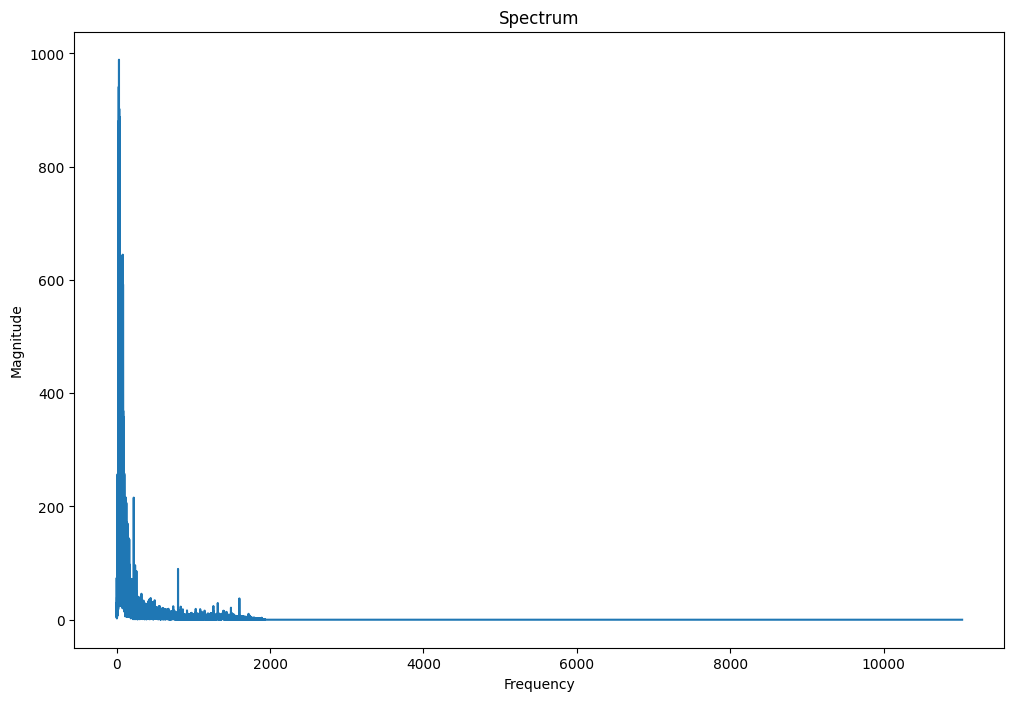

In [13]:
fft_normal = np.fft.fft(normal_sound_sample)
magnitude_normal = np.abs(fft_normal)
freq_normal = np.linspace(0,sample_rate, len(magnitude_normal)) 
half_freq = freq_normal[:int(len(freq_normal)/2)]
half_magnitude = magnitude_normal[:int(len(freq_normal)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.title("Spectrum")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

*Aşağıdaki kod, normal bir ses örneğinin spektrogramını hesaplar ve görselleştirir. Spektrogram, frekansın zamanla nasıl değiştiğini gösterir ve sesin frekans bileşenlerini zamana bağlı olarak görselleştirir.*






STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

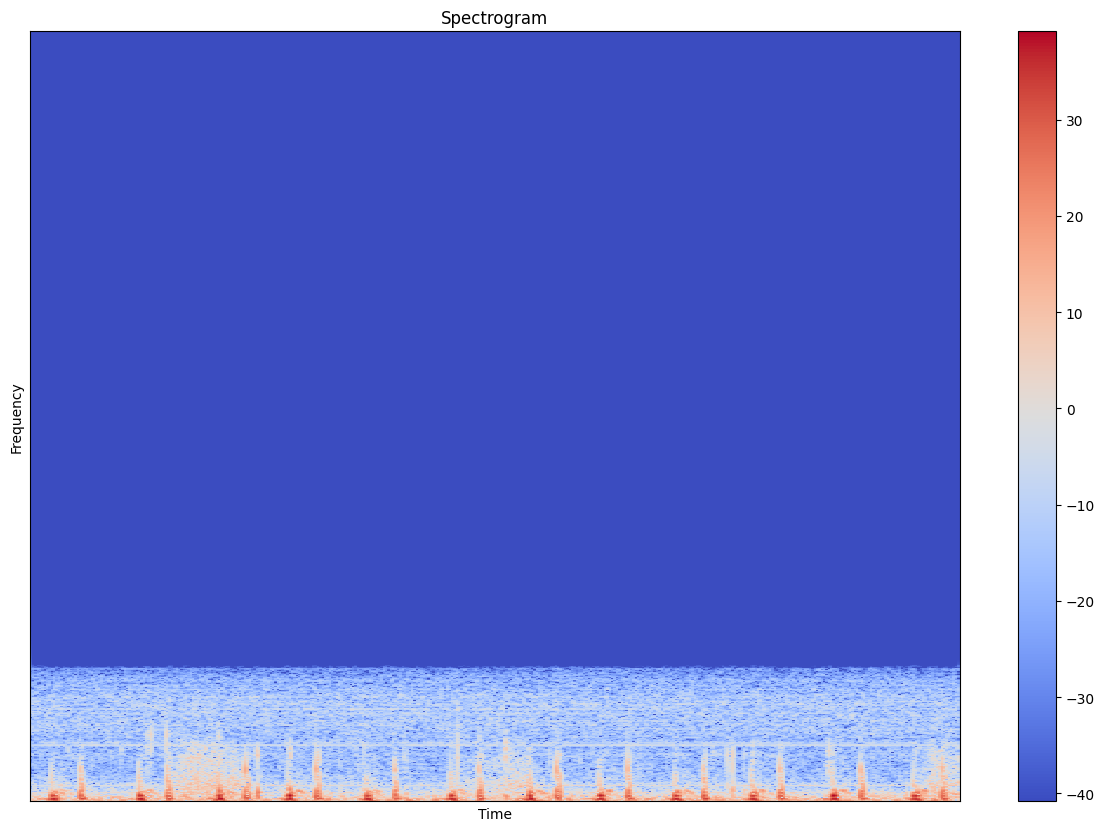

In [14]:
# STFT -> spectrogram
#Hop length, zaman boyunca uygulanan kaydırmanın numune sayısıdır ve n_fft, FFT'nin uygulandığı pencerenin numune sayısıdır.
hop_length = 512 
n_fft = 2048 

#  hop_length ve n_fft değerlerinin saniye cinsinden sürelerini hesaplama
hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# normal ses örneğinin STFT'sini (Kısa Zamanlı Fourier Dönüşümü) hesaplar. STFT, sinyali frekans-zaman alanına dönüştürür.
stft_normal = librosa.stft(normal_sound_sample, n_fft=n_fft, hop_length=hop_length)

# karmaşık sayıların mutlak değerini alarak spektrogramın büyüklüğünü hesapla
# spektrogramun logaritmik ölçekli halini elde et
spectrogram = np.abs(stft_normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()

plt.title("Spectrogram")

Bu kod, normal bir ses örneğinden MFCC özelliklerini çıkarır ve görselleştirir. MFCC, ses sinyalini frekans ve zamanda temsil etmek için kullanılan bir özellik vektörüdür. MFCC özellikleri, sesin yükseklik, vokalik ve prosodik özelliklerini temsil eder ve birçok ses işleme uygulamasında kullanılır.

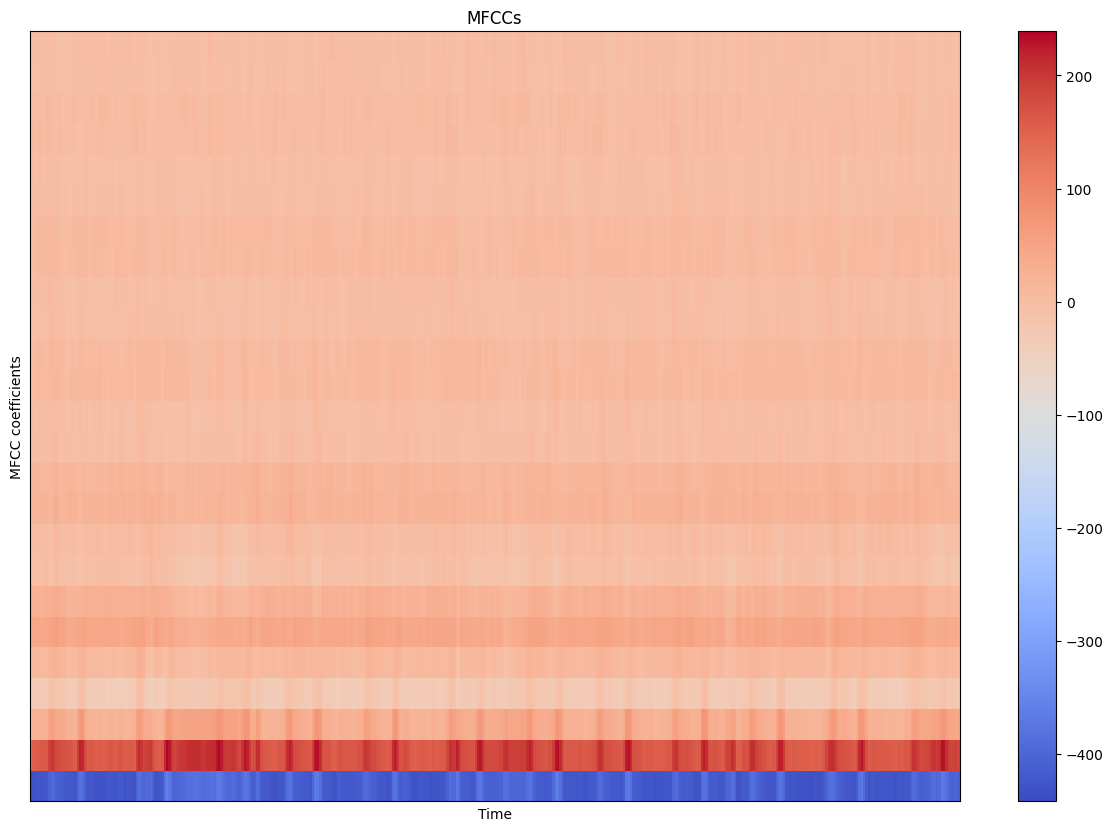

In [15]:
# MFCCs
# adesiyle, normal ses örneğinden MFCC özelliklerini çıkarır. y parametresi ses sinyalini, sr parametresi örnekleme hızını, n_fft ve hop_length parametreleri STFT için kullanılan değerleri, n_mfcc parametresi ise çıkarılan MFCC katsayısı sayısını belirtir.
MFCCs = librosa.feature.mfcc(y=normal_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()

plt.title("MFCCs")

plt.show()

 "murmur" klasöründen rastgele bir ses örneği seç ve o örneği dinlet



In [16]:
random_murmur= np.random.randint(0,len(os.listdir(murmur_data))) 
murmur_sound = os.listdir(murmur_data)[random_murmur]
murmur_sound_address = murmur_data+murmur_sound
murmur_sound_sample,sample_rate = librosa.load(murmur_sound_address)
ipd.Audio(murmur_sound_sample,rate=sample_rate)

*"murmur" klasöründen seçilen ses örneğinin zaman-domainindeki amplitüdünü görselleştirmek için bir çizgi grafiği oluştur*

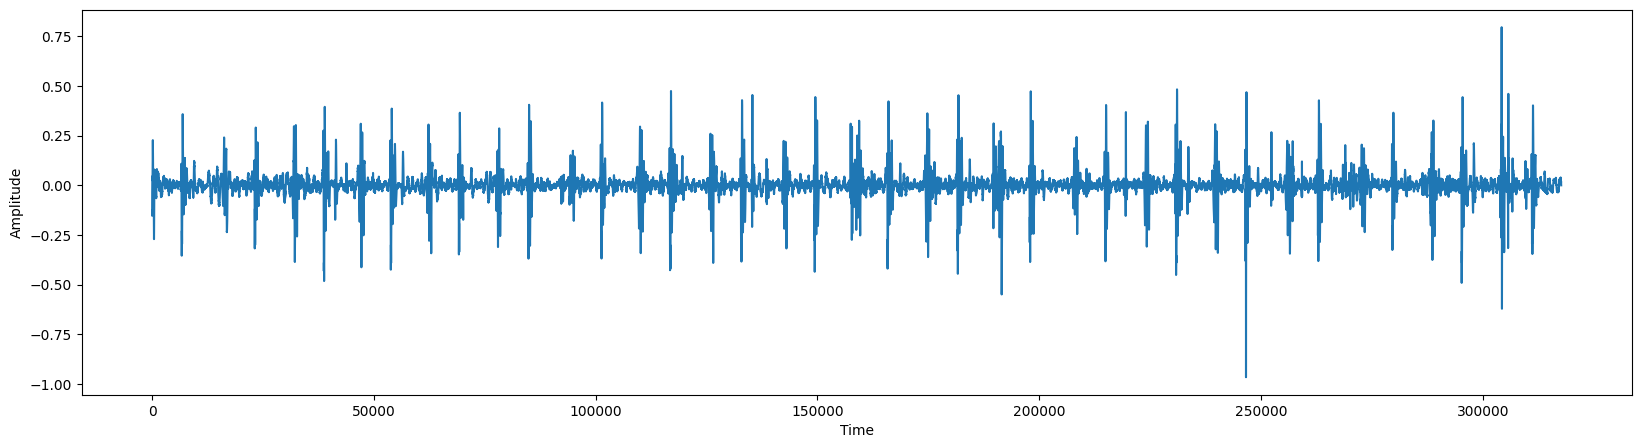

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(murmur_sound_sample)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

 "murmur" ses örneğinin frekans-domainindeki spektrumunu görselleştirmek için bir çizgi grafiği oluştur

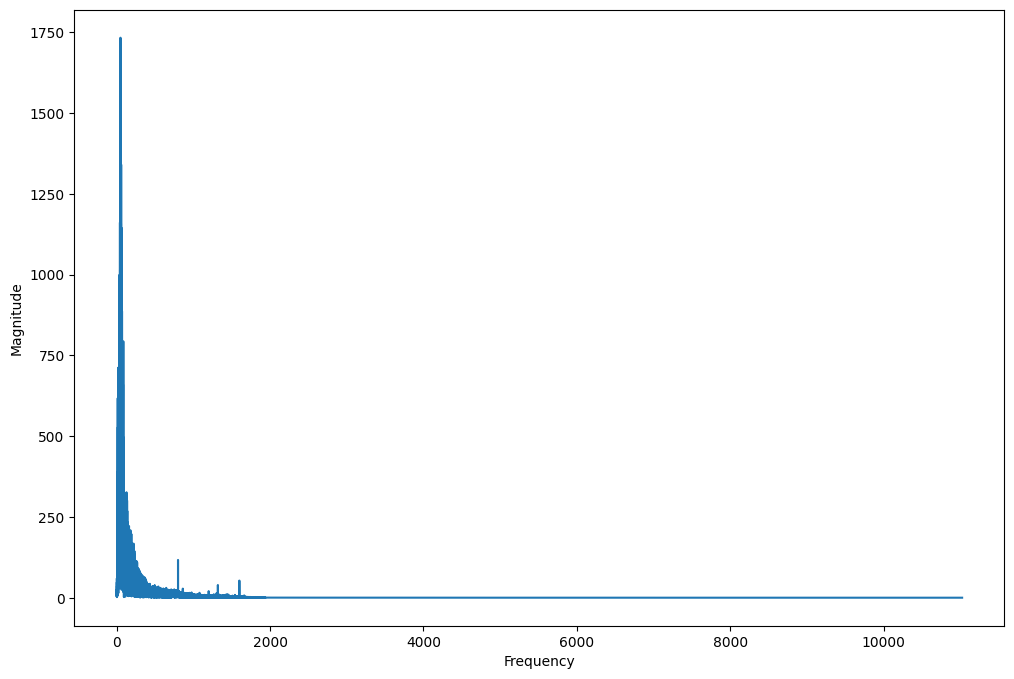

In [18]:
fft_murmur = np.fft.fft(murmur_sound_sample)
magnitude_murmur = np.abs(fft_murmur)
freq_murmur = np.linspace(0,sample_rate, len(magnitude_murmur)) 
half_freq = freq_murmur[:int(len(freq_murmur)/2)]
half_magnitude = magnitude_murmur[:int(len(freq_murmur)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

"murmur" ses örneğinin zaman-frekans spektrogramını görselleştir.Spektrogram, zamanın işitsel özelliklerine bağlı olarak frekans bileşenlerini göster.

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_murmur')

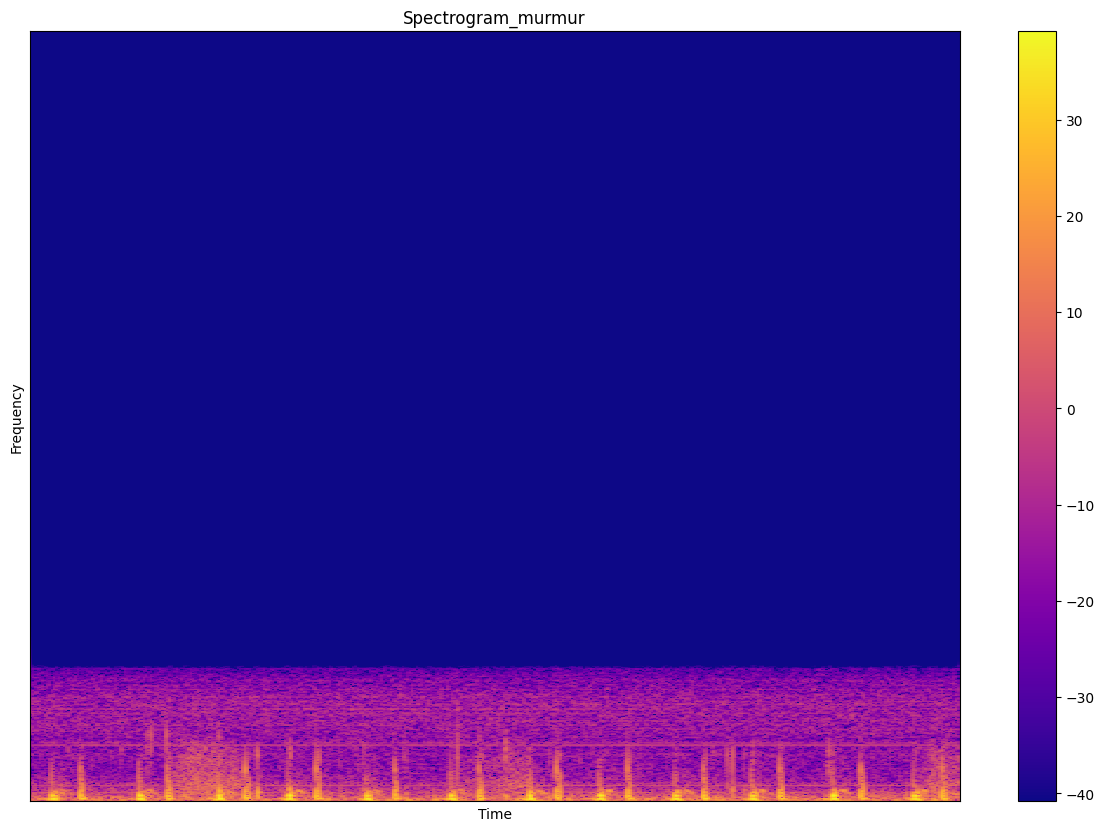

In [19]:
hop_length = 512 
n_fft = 2048 

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

stft_murmur = librosa.stft(murmur_sound_sample, n_fft=n_fft, hop_length=hop_length)

spectrogram_murmur = np.abs(stft_murmur)
log_spectrogram_murmur = librosa.amplitude_to_db(spectrogram_murmur)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("plasma")
plt.title("Spectrogram_murmur")

*"murmur" ses örneğinden çıkarılan MFCC özelliklerini görselleştir. MFCC'ler, sesin spektral içeriğini temsil eden önemli özelliklerdir ve genellikle ses sınıflandırma ve tanıma gibi işlemlerde kullanılır.*

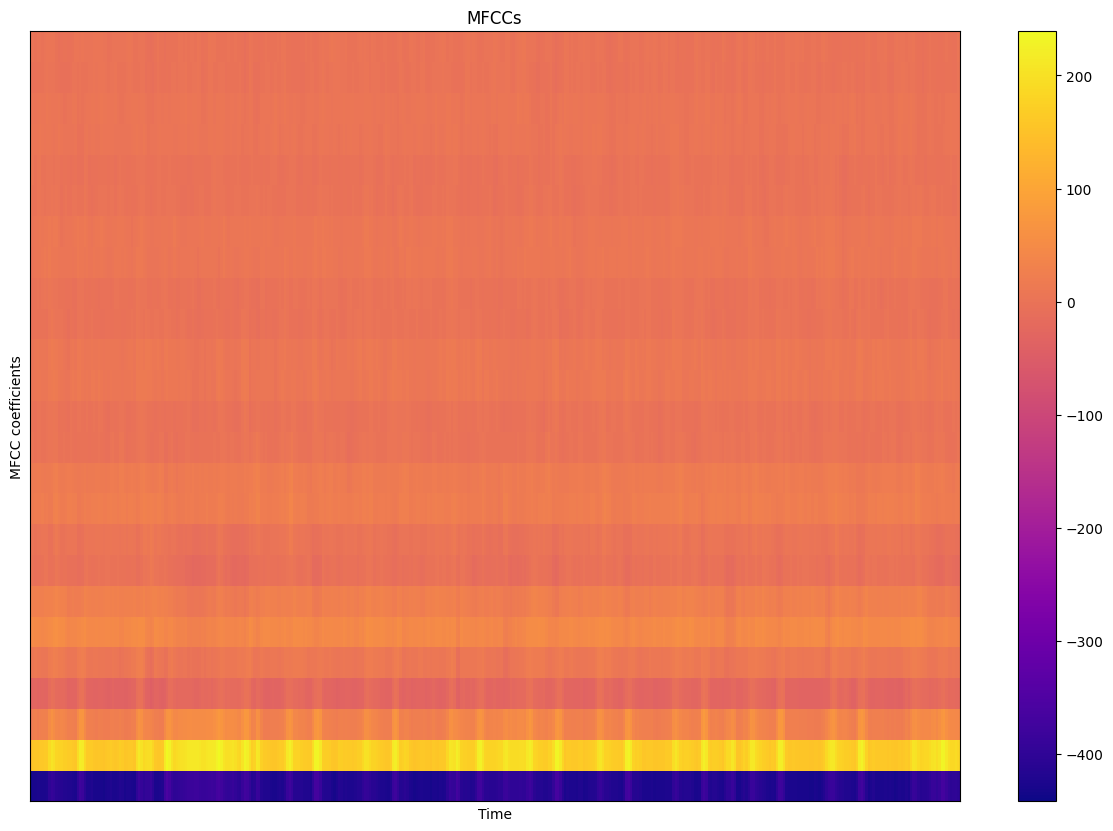

In [20]:

MFCCs_murmur = librosa.feature.mfcc(y=murmur_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("plasma")
plt.title("MFCCs")

plt.show()

"extrastole" klasöründen rastgele bir ses örneği seç ve onu oynat


In [21]:
random_extrastole= np.random.randint(0,len(os.listdir(extrastole_data))) 
extrastole_sound = os.listdir(extrastole_data)[random_extrastole]
extrastole_sound_address = extrastole_data+extrastole_sound
extrastole_sound_sample,sample_rate = librosa.load(extrastole_sound_address)
ipd.Audio(extrastole_sound_sample,rate=sample_rate)

*"extrastole" klasöründen seçilen ses örneğinin zaman alanını görselleştirmek için bir çizgi grafiği oluştur*

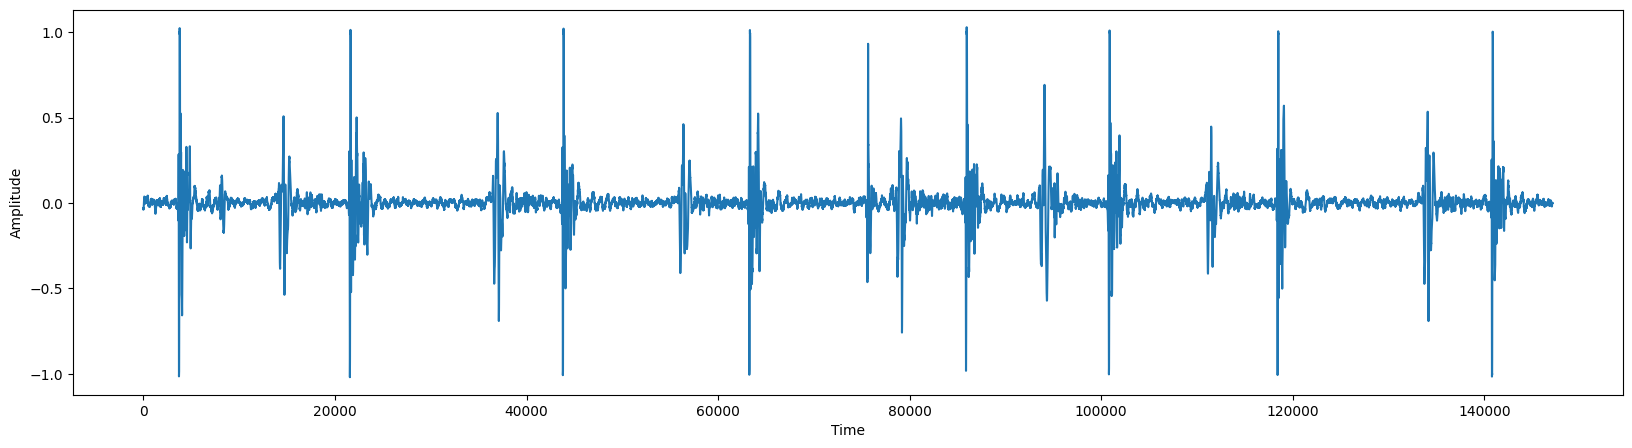

In [22]:
plt.figure(figsize=(20, 5))
plt.plot(extrastole_sound_sample)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

*extrastole" klasöründen seçilen ses örneğinin frekans alanını görselleştirmek için bir çizgi grafiği oluştur*

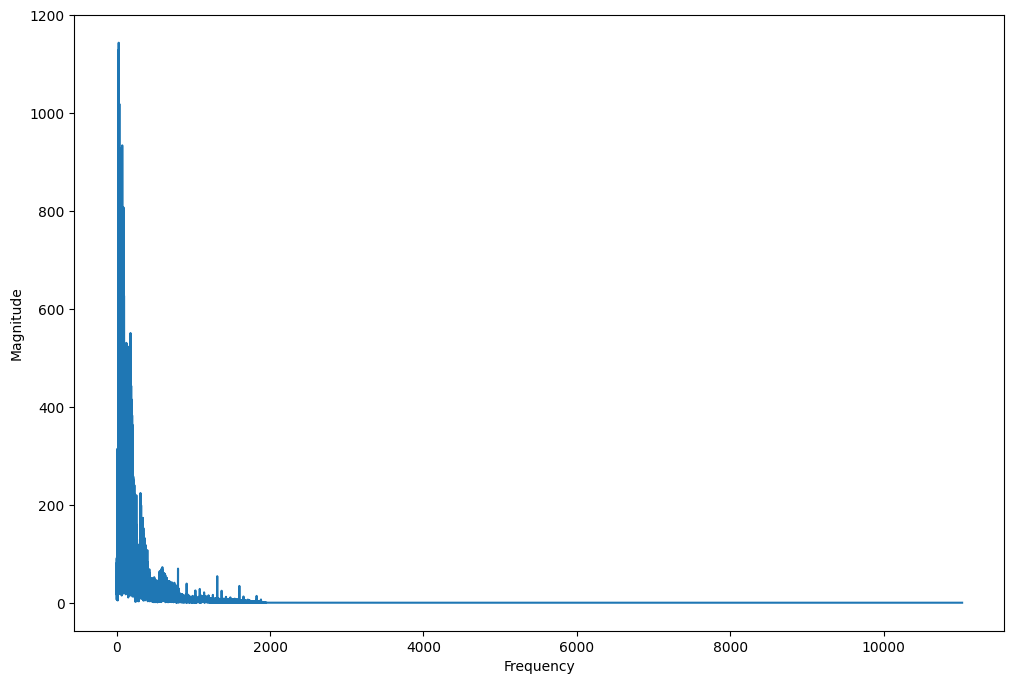

In [23]:
fft_extrastole = np.fft.fft(extrastole_sound_sample)
magnitude_extrastole = np.abs(fft_extrastole)
freq_extrastole = np.linspace(0,sample_rate, len(magnitude_extrastole)) 
half_freq = freq_extrastole[:int(len(freq_extrastole)/2)]
half_magnitude = magnitude_extrastole[:int(len(freq_extrastole)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

*"extrastole" klasöründen seçilen ses örneğinin spektrogramını görselleştirmek için bir spektrogram grafiği oluştur*

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_extrastole')

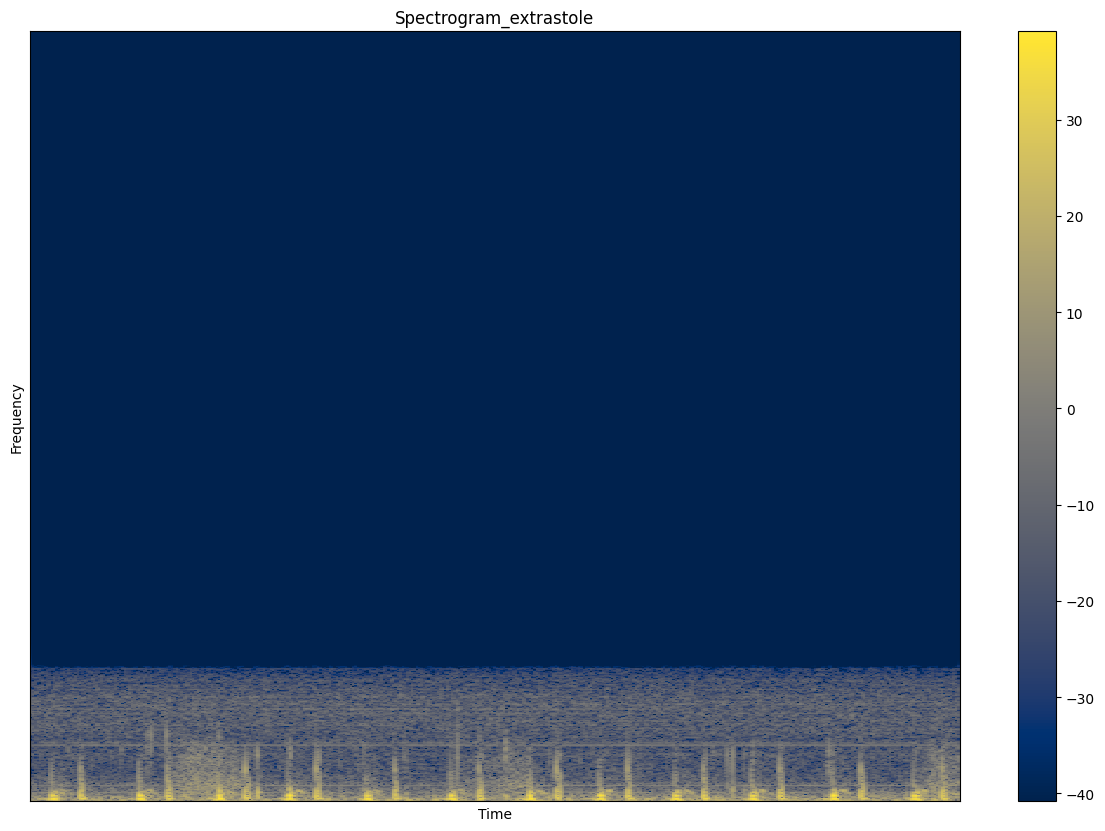

In [24]:
hop_length = 512 
n_fft = 2048 


hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

stft_extrastole = librosa.stft(extrastole_sound_sample, n_fft=n_fft, hop_length=hop_length)

spectrogram_extrastole = np.abs(stft_extrastole)
log_spectrogram_extrastole = librosa.amplitude_to_db(spectrogram_extrastole)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("cividis")
plt.title("Spectrogram_extrastole")

*"extrastole" klasöründen seçilen ses örneğinin MFCC (Mel-Frequency Cepstral Coefficients) özelliklerini görselleştirmek için bir MFCC grafiği oluştur*

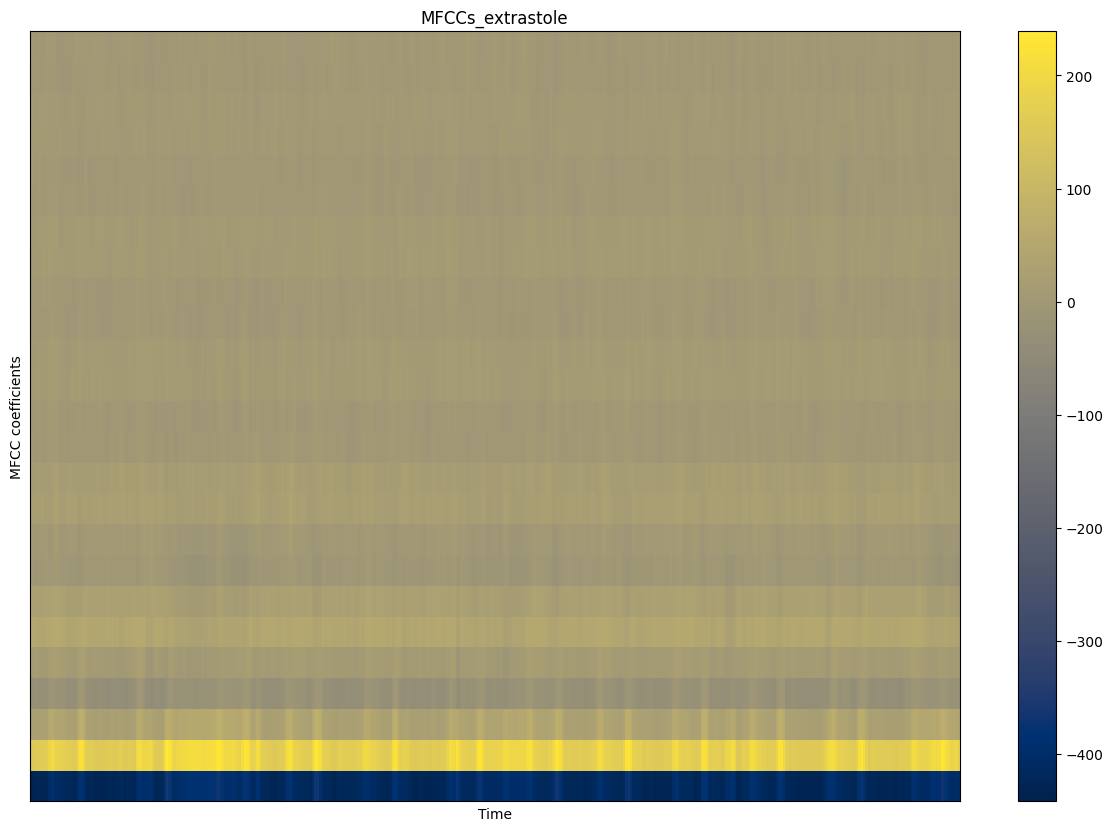

In [25]:
MFCCs_extrastole = librosa.feature.mfcc(y=extrastole_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("cividis")
plt.title("MFCCs_extrastole")

plt.show()

"artifact" klasöründen rastgele bir ses örneği seçer ve bu sesi oynat

In [26]:
random_artifact= np.random.randint(0,len(os.listdir(artifact_data))) 
artifact_sound = os.listdir(artifact_data)[random_artifact]
artifact_sound_address = artifact_data+artifact_sound
artifact_sound_sample,sample_rate = librosa.load(artifact_sound_address)
ipd.Audio(artifact_sound_sample,rate=sample_rate)

"artifact" klasöründeki bir ses örneğinin tam adresi

In [27]:
artifact_sound_address

'/content/drive/MyDrive/Colab Notebooks/YZ_Uygulamaları/Heartbeat_Sound/artifact/artifact__201106111119.wav'

"artifact_sound_sample" adlı ses örneğinin zamana göre genlik değerlerini grafiğe çiz


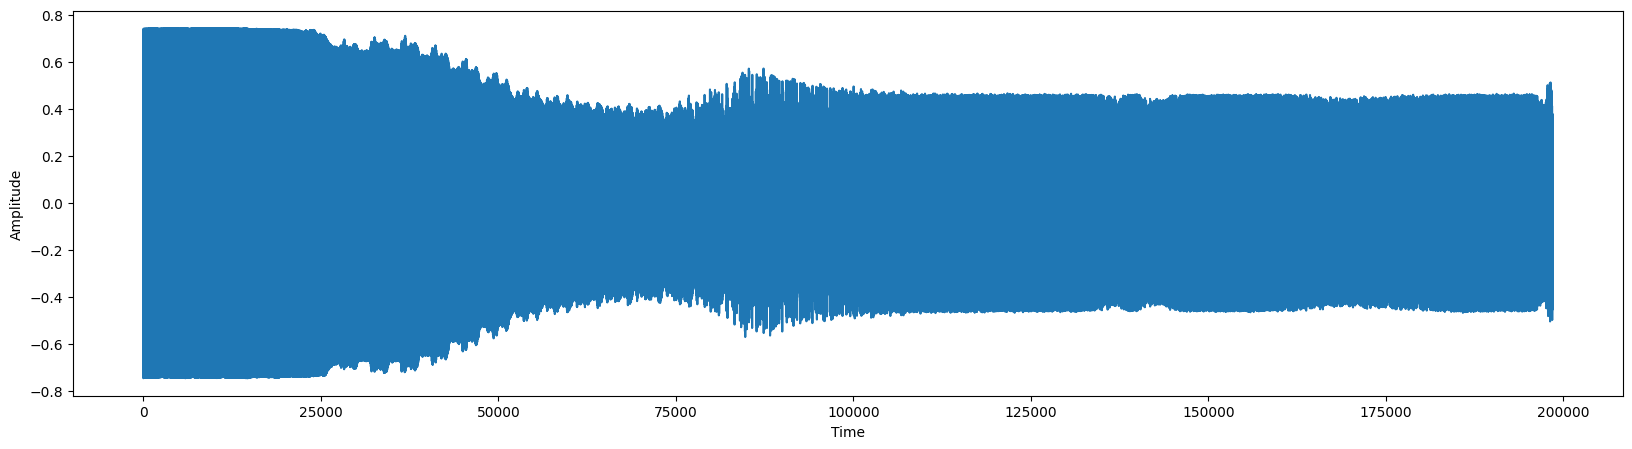

In [28]:
plt.figure(figsize=(20, 5))
plt.plot(artifact_sound_sample)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

"artifact_sound_sample" adlı ses örneğinin frekans bileşenlerini ve bu bileşenlerin genlik değerlerini görselleştir

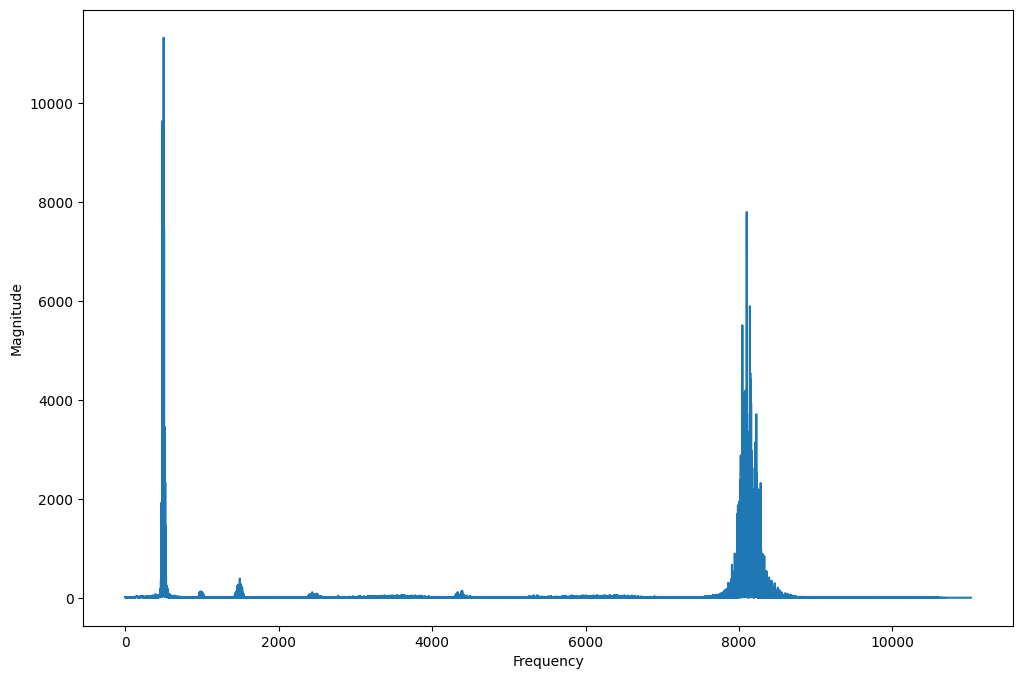

In [29]:
fft_artifact = np.fft.fft(artifact_sound_sample)
magnitude_artifact = np.abs(fft_artifact)
freq_artifact = np.linspace(0,sample_rate, len(magnitude_artifact)) 
half_freq = freq_artifact[:int(len(freq_artifact)/2)]
half_magnitude = magnitude_artifact[:int(len(freq_artifact)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

 "artifact_sound_sample" adlı ses örneğinin spektrogramını görselleştir

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_artifacte')

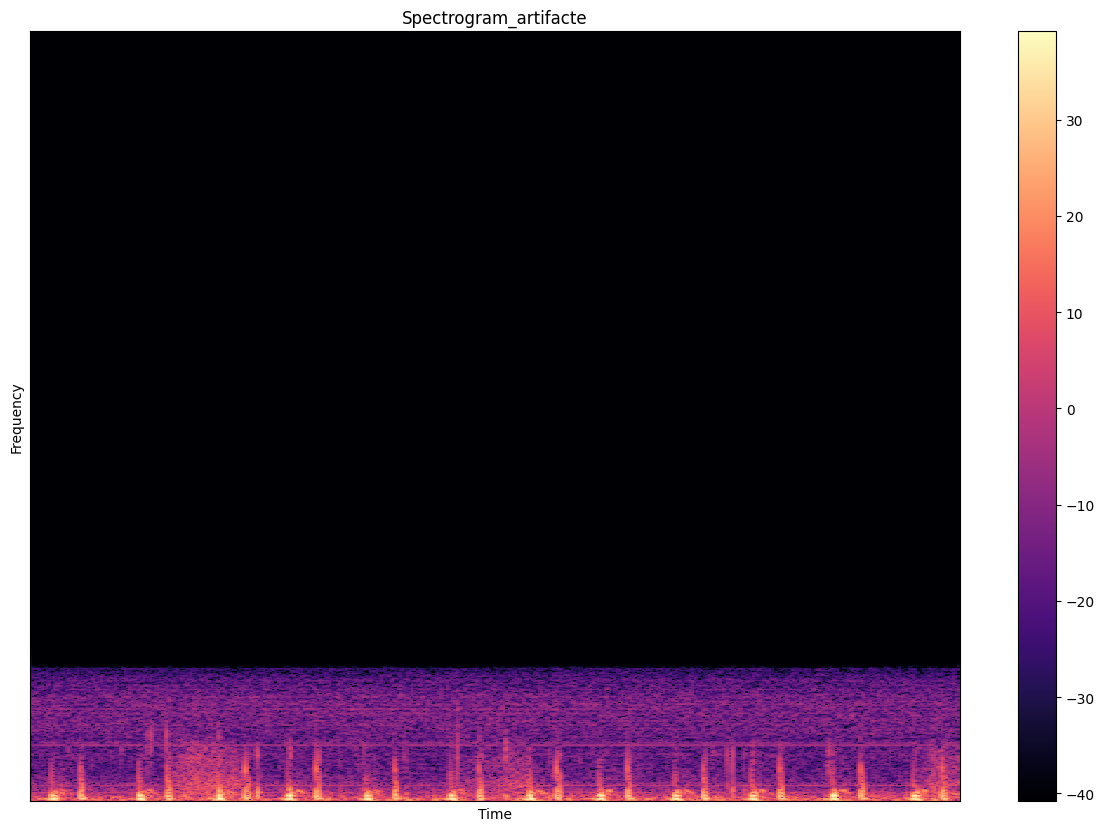

In [30]:
hop_length = 512 
n_fft = 2048 

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

stft_artifact = librosa.stft(artifact_sound_sample, n_fft=n_fft, hop_length=hop_length)

spectrogram_artifact = np.abs(stft_artifact)
log_spectrogram_artifact = librosa.amplitude_to_db(spectrogram_artifact)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("magma")
plt.title("Spectrogram_artifacte")

"artifact_sound_sample" adlı ses örneğinden 25 adet MFCC (Mel Frequency Cepstral Coefficients) özniteliklerinin çıkart ve görselleştir

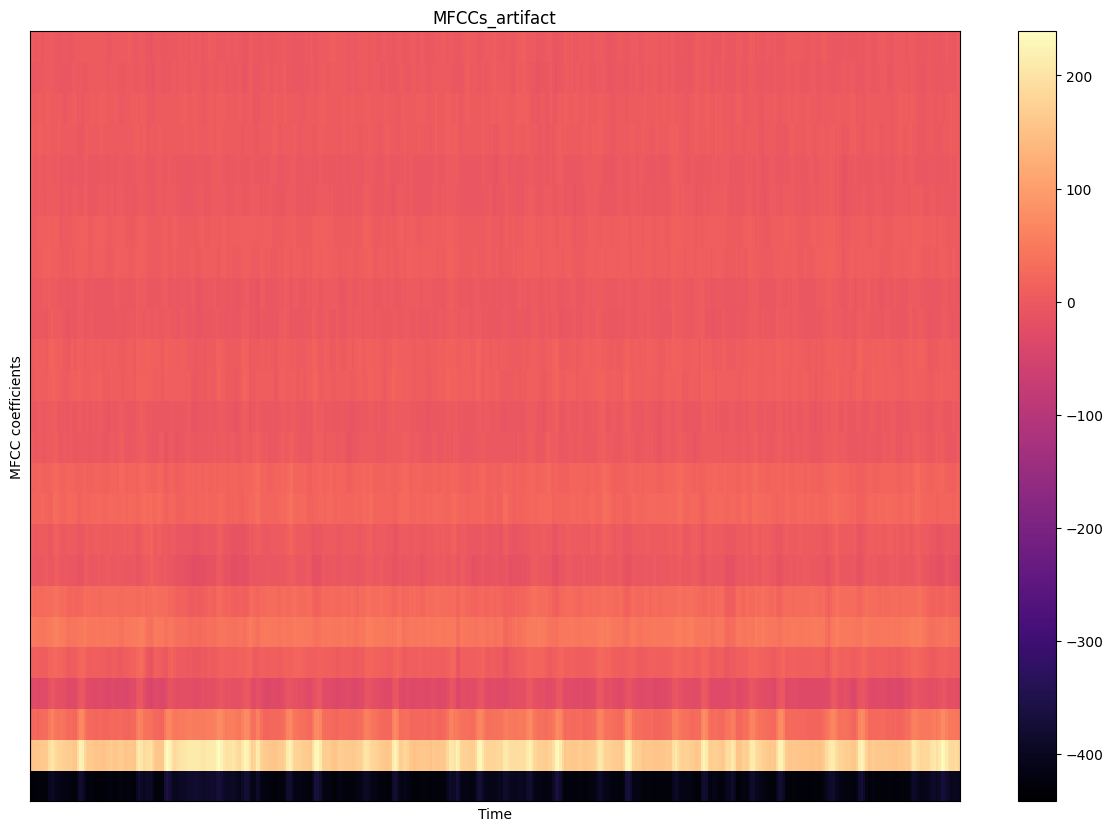

In [31]:
MFCCs_artifact = librosa.feature.mfcc(y=artifact_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("magma")
plt.title("MFCCs_artifact")

plt.show()

"extrahls_data" dizinindeki ses dosyalarından rastgele birini seç, dosya yolunu oluştur, seçilen ses dosyasını yükle ve ardından sesi oynat

In [32]:
random_extrahls= np.random.randint(0,len(os.listdir(extrahls_data))) 
extrahls_sound = os.listdir(extrahls_data)[random_extrahls]
extrahls_sound_address = extrahls_data+extrahls_sound
extrahls_sound_sample,sample_rate = librosa.load(extrahls_sound_address)
ipd.Audio(extrahls_sound_sample,rate=sample_rate)

"extrahls_sound_sample" adlı ses örneğinin zamana bağlı olarak genlik değerlerini grafiğe dök ve grafiği görselleştir

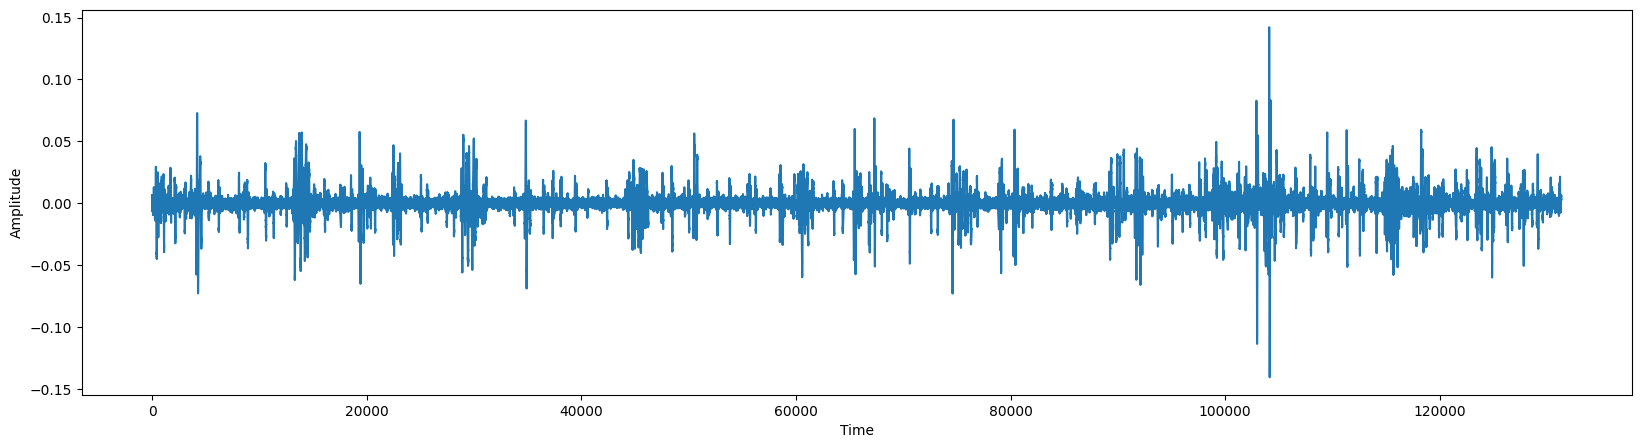

In [33]:
plt.figure(figsize=(20, 5))
plt.plot(extrahls_sound_sample)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

"extrahls_sound_sample" adlı ses örneğinin frekans alanında temsilini oluşturmak için FFT (Hızlı Fourier Dönüşümü) kullan

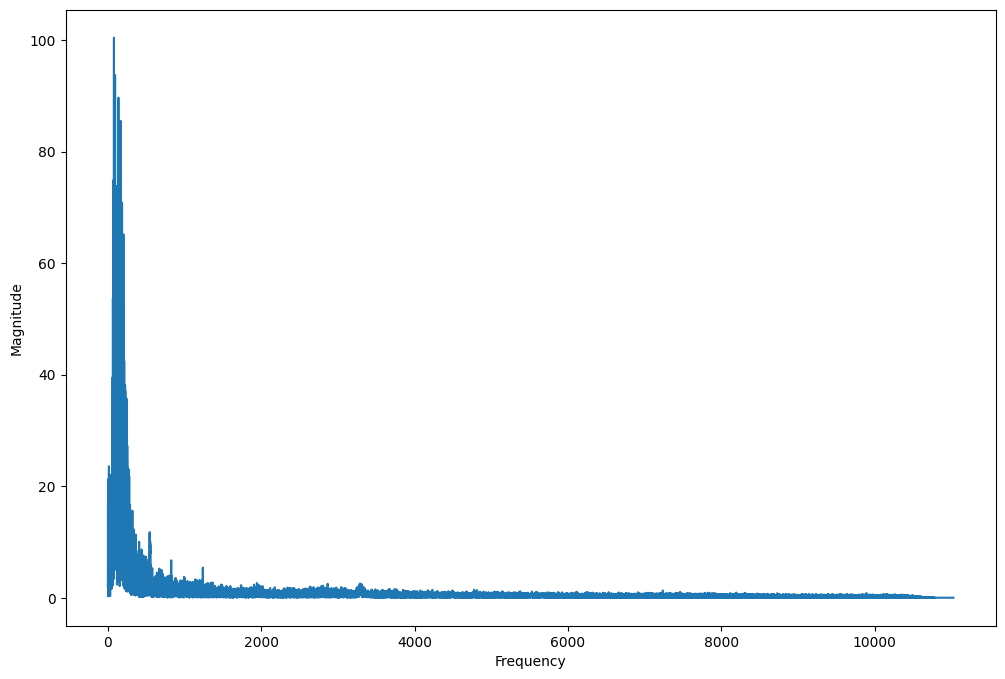

In [34]:
fft_extrahls = np.fft.fft(extrahls_sound_sample)
magnitude_extrahls = np.abs(fft_extrahls)
freq_extrahls = np.linspace(0,sample_rate, len(magnitude_extrahls)) 
half_freq = freq_extrahls[:int(len(freq_extrahls)/2)]
half_magnitude = magnitude_extrahls[:int(len(freq_extrahls)/2)]

plt.figure(figsize=(12,8))
plt.plot(half_freq,half_magnitude)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.show()

"extrahls_sound_sample" adlı ses örneğinin zaman-frekans alanında temsilini oluşturmak için STFT (Kısa Süreli Fourier Dönüşümü) ve spektrogram kullan

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram_extrahlse')

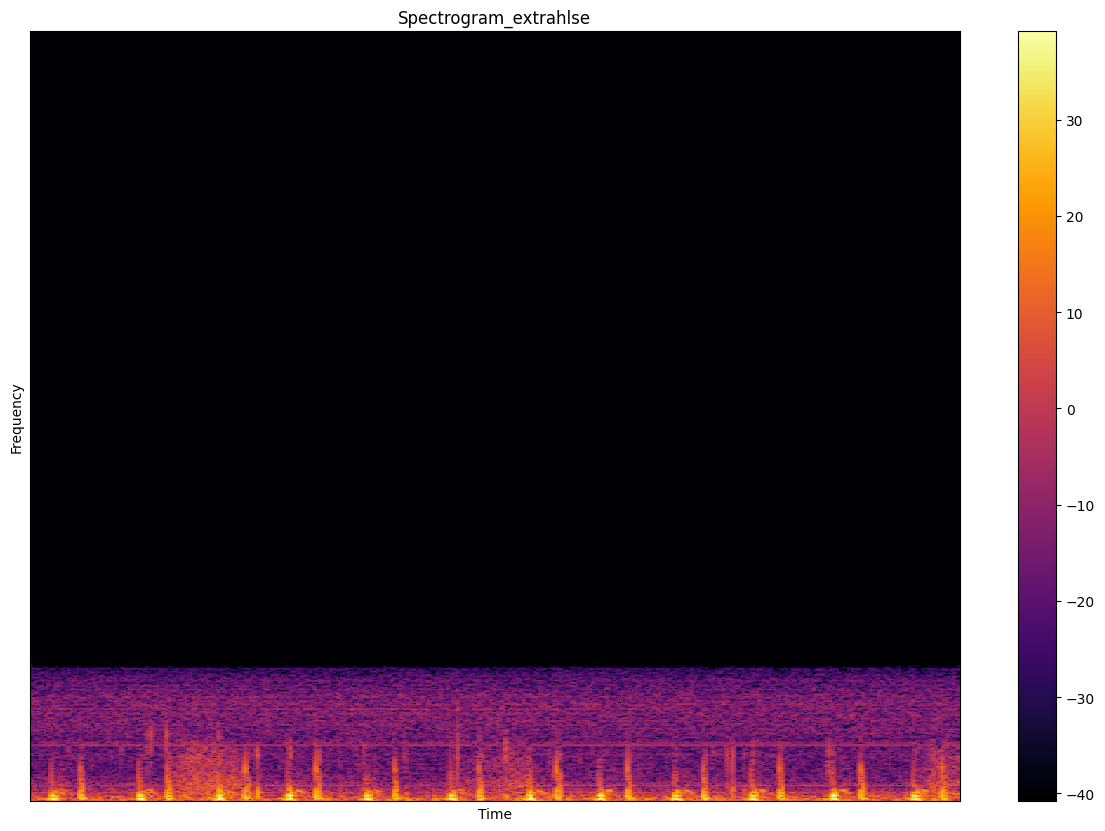

In [35]:
hop_length = 512 
n_fft = 2048 

hop_length_duration = float(hop_length)/sample_rate
n_fft_duration = float(n_fft)/sample_rate

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

stft_extrahls = librosa.stft(extrahls_sound_sample, n_fft=n_fft, hop_length=hop_length)

spectrogram_extrahls = np.abs(stft_extrahls)
log_spectrogram_extrahls = librosa.amplitude_to_db(spectrogram_extrahls)

plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
plt.set_cmap("inferno")
plt.title("Spectrogram_extrahlse")

"extrahls_sound_sample" adlı ses örneğinden MFCC (Mel Frekans Cepstral Katsayıları) özelliklerini çıkarmak ve görselleştirmek için kullan

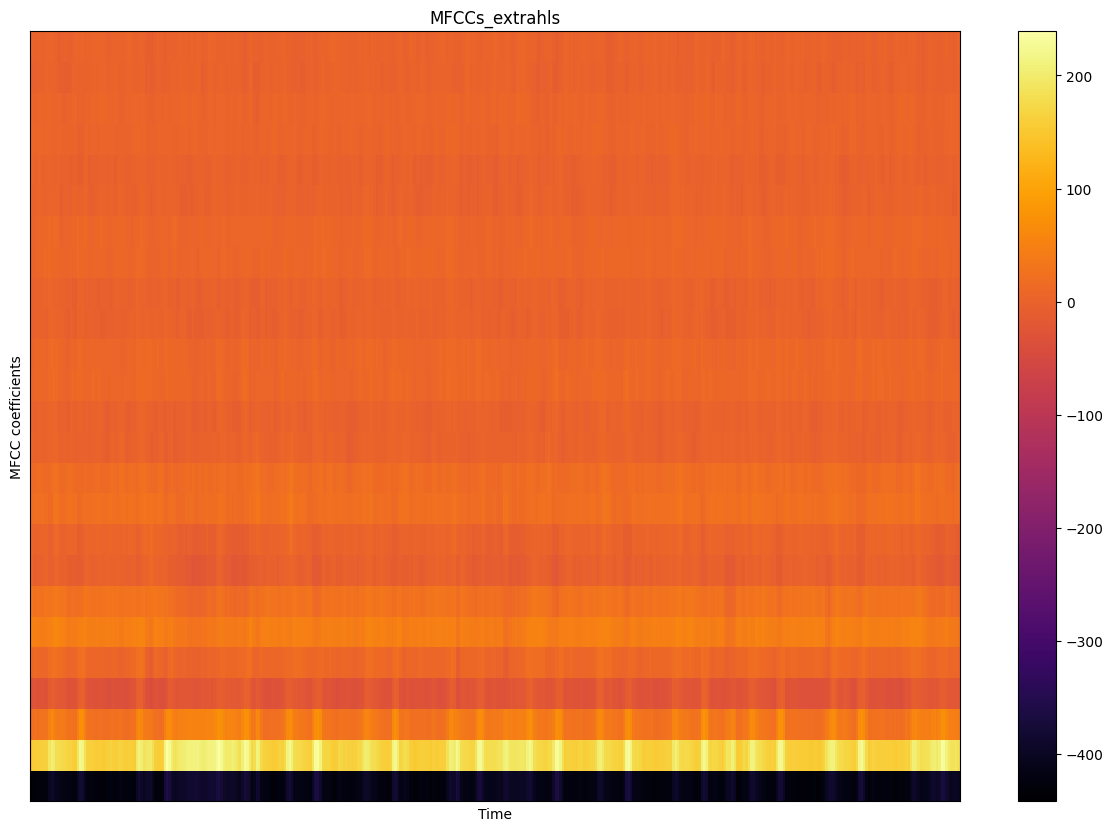

In [36]:
MFCCs_extrahls = librosa.feature.mfcc(y=extrahls_sound_sample, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mfcc=25)

plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sample_rate, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
plt.set_cmap("inferno")
plt.title("MFCCs_extrahls")

plt.show()

*Aşağıdaki kod işlev, her ses dosyasını açar, uzunluğunu kontrol eder ve belirtilen hedef uzunluğa ulaşmak için dosyayı doldurur veya kırpar.*
İşlevin giriş parametreleri şunlardır:


*   audio_dir: Ses dosyalarının bulunduğu dizin.
*   desired_length: Düzeltilecek hedef uzunluk (örneğin, istenen süre).

*İşlev, os.listdir(audio_dir) kullanarak belirtilen ses dizinindeki dosya isimlerini alır. Ardından, her dosya için aşağıdaki adımları gerçekleştirir: *


1.   Dosya yolu oluşturulur: file_path = os.path.join(audio_dir, file_name).
2.   Dosya adının .wav ile bitip bitmediği kontrol edilir: if file_name.endswith('.wav').
3.   librosa.load fonksiyonu kullanılarak ses dosyası ve örnekleme hızı (sr) elde edilir. sr=None argümanı, örnekleme hızını dosyadan otomatik olarak almasını sağlar.
4. Sesin uzunluğu (X) ve örnekleme hızı (sr) elde edildikten sonra, dosyanın uzunluğunu kontrol etmek ve düzeltmek için işlemler yapılır:
Eğer ses uzunluğu, hedef uzunluktan daha kısa ise, sesin sonuna sıfırlardan oluşan bir tamamlama yapılır: X = np.pad(X, (0, desired_length - len(X)), 'constant').
Eğer ses uzunluğu, hedef uzunluktan daha uzun ise, sesin fazla kısmı kesilir: X = X[:desired_length].
5. Değiştirilmiş ses dosyası, librosa.output.write_wav fonksiyonu kullanılarak aynı dosya üzerine kaydedilir: librosa.output.write_wav(file_path, X, sr).

*Bu kodla belirtilen dizindeki her ses dosyasının uzunluğu düzeltilir ve hedeflenen uzunluğa ulaşılır. Her dosya için hata durumlarında hata mesajları yazdırılır, ancak işlev devam eder ve diğer dosyalara devam eder.*


*Bu kod , belirli bir klasörde bulunan ses dosyalarını yüklemek ve işlemek için kullanılır. Bu kodda örnek kullanımında, önceden belirtilen audio_directory değişkeni ve desired_length değeri kullanılarak ses dosyalarının uzunlukları düzeltilir. Ardından, load_file_data işlevi kullanılarak düzeltilmiş ses dosyaları yüklenir ve MFCC özelliklerini içeren bir veri listesi döndürülür.* 

In [37]:
import os
import librosa
import numpy as np
import traceback

def fix_audio_length(audio_dir, desired_length):
    for file_name in os.listdir(audio_dir):
        file_path = os.path.join(audio_dir, file_name)
        if file_name.endswith('.wav'):
            try:
                print("Fixing audio length:", file_name)
                X, sr = librosa.load(file_path, sr=None)
                
                if len(X) < desired_length:
                    X = np.pad(X, (0, desired_length - len(X)), 'constant')
                elif len(X) > desired_length:
                    X = X[:desired_length]
                
                librosa.output.write_wav(file_path, X, sr)
            except Exception as e:
                print("Error encountered while fixing audio length:", file_name)
                print(str(e))

def load_file_data(folder, file_names, duration, sr=22050):
    data = []
    for file_name in file_names:
        try:
            file_path = os.path.join(folder, file_name)
            X, sample_rate = librosa.load(file_path, sr=sr, duration=duration)
            input_length = sr * duration
            if len(X) < input_length:
                print("Fixing audio length:", file_name)
                X = np.pad(X, (0, input_length - len(X)), 'constant')
            mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=25).T, axis=0)
        except Exception as e:
            print("Error encountered while parsing file:", file_name)
            traceback.print_exc()
            mfccs = []  
        feature = np.array(mfccs).reshape([-1, 1])
        data.append(feature)
    return data

# Örnek kullanım
audio_directory = "/content/drive/MyDrive/Colab Notebooks/YZ_Uygulamaları/Heartbeat_Sound"
desired_length = 22050  
fix_audio_length(audio_directory, desired_length)

*Altta bulunan kod parçası, kategorik etiketleri basit bir kodlamayla temsil etmek ve sadece 3 türe dönüştürmek için kullanılır. Belirli sınıf etiketleri için bir eşleme işlemi gerçekleştirir ve etiketlerin metin değerlerini tamsayı değerlerine ve tam tersine dönüştürür.

CLASSES listesi, kategorik etiketlerin metin değerlerini içerir. Bu örnekte, "artifact", "murmur" ve "normal" etiketleri kullanılır.
NB_CLASSES değişkeni, sınıf sayısını temsil eder ve CLASSES listesinin uzunluğuna eşittir.
label_to_int sözlüğü, metin etiketleri tamsayı değerlerine eşleyen bir sözlük oluşturur. Bu sözlük, sınıf etiketlerini temsil etmek için kullanılır.
int_to_label sözlüğü, tamsayı değerlerini metin etiketlere eşleyen bir sözlük oluşturur. Bu sözlük, tamsayı değerlerini etiketlere dönüştürmek için kullanılır.*

In [38]:
# Normal ( extrahls ve extrastole)
# Murmur
# Artifact
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

CLASSES = ['artifact','murmur','normal']
NB_CLASSES=len(CLASSES)

label_to_int = {k:v for v,k in enumerate(CLASSES)}
print (label_to_int)
print (" ")
int_to_label = {v:k for k,v in label_to_int.items()}
print(int_to_label)

{'artifact': 0, 'murmur': 1, 'normal': 2}
 
{0: 'artifact', 1: 'murmur', 2: 'normal'}


*Aşağıdaki kod parçası, veri kümesindeki farklı sınıflara ait ses dosyalarını yükler ve bu dosyaların özelliklerini ve etiketlerini oluşturur.*

*   artifact_files, normal_files, extrahls_files ve murmur_files listeleri, ilgili sınıfa ait ses dosyalarının adlarını içerir. fnmatch.filter fonksiyonu, belirtilen desene ('artifact*.wav', 'normal*.wav', 'extrahls*.wav', 'murmur*.wav') uyan dosya adlarını filtreler.
*   artifact_sounds, normal_sounds, extrahls_sounds ve murmur_sounds listeleri, ses dosyalarının özelliklerini temsil eden veri dizilerini içerir. load_file_data fonksiyonu, belirli bir süre (MAX_SOUND_CLIP_DURATION) ve örnekleme hızı (varsayılan olarak 22050) kullanarak ses dosyalarını yükler ve MFCC özelliklerini hesaplar.
*   artifact_labels, normal_labels, extrahls_labels ve murmur_labels listeleri, ilgili sınıfa ait ses dosyalarının etiketlerini içerir. Bu etiketler, sınıfın tamsayı değerini temsil eder. Örneğin, artifact_labels listesindeki tüm değerler 0'dır, normal_labels listesindeki tüm değerler 2'dir ve murmur_labels listesindeki tüm değerler 1'dir.

*Bu işlemlerle, her sınıfa ait ses dosyaları yüklenmiş, özellikleri hesaplanmış ve etiketlenmiştir.* 

In [39]:
SAMPLE_RATE = 22050
MAX_SOUND_CLIP_DURATION=10

artifact_files = fnmatch.filter(os.listdir(artifact_data), 'artifact*.wav')
artifact_sounds = load_file_data (folder=artifact_data, file_names = artifact_files, duration=MAX_SOUND_CLIP_DURATION)
artifact_labels = [0 for items in artifact_files]

normal_files = fnmatch.filter(os.listdir(normal_data), 'normal*.wav')
normal_sounds = load_file_data(folder=normal_data,file_names=normal_files, duration=MAX_SOUND_CLIP_DURATION)
normal_labels = [2 for items in normal_sounds]

extrahls_files = fnmatch.filter(os.listdir(extrahls_data), 'extrahls*.wav')
extrahls_sounds = load_file_data(folder=extrahls_data,file_names=extrahls_files, duration=MAX_SOUND_CLIP_DURATION)
extrahls_labels = [2 for items in extrahls_sounds]

murmur_files = fnmatch.filter(os.listdir(murmur_data), 'murmur*.wav')
murmur_sounds = load_file_data(folder=murmur_data,file_names=murmur_files, duration=MAX_SOUND_CLIP_DURATION)
murmur_labels = [1 for items in murmur_files]


extrastole_files = fnmatch.filter(os.listdir(extrastole_data), 'extrastole*.wav')
extrastole_sounds = load_file_data(folder=extrastole_data,file_names=extrastole_files, duration=MAX_SOUND_CLIP_DURATION)
extrastole_labels = [2 for items in extrastole_files]

print ("Loading Done")

Fixing audio length: artifact__201106161019.wav
Fixing audio length: artifact__201106010559.wav
Fixing audio length: artifact__201106040933.wav
Fixing audio length: artifact__201106131835.wav
Fixing audio length: artifact__201106161016.wav
Fixing audio length: artifact__201106141701.wav
Fixing audio length: artifact__201106021541.wav
Fixing audio length: artifact__201106121445.wav
Fixing audio length: artifact__201012172012.wav
Fixing audio length: artifact__201106010602.wav
Fixing audio length: artifact__201106070949.wav
Fixing audio length: artifact__201106161219.wav
Fixing audio length: artifact__201106121242.wav
Fixing audio length: artifact__201105190800.wav
Fixing audio length: artifact__201106040947.wav
Fixing audio length: artifact__201106031558.wav
Fixing audio length: artifact__201106101314.wav
Fixing audio length: artifact__201106131834.wav
Fixing audio length: artifact__201106050353.wav
Fixing audio length: artifact__201105061143.wav
Fixing audio length: artifact__201105040

Alttaki kod, etiketi olmayan test veri setini yükler ve her bir kayda -1 etiketi atar. 


*   Bunlabelledtest_files: unlabel_data klasöründe "Bunlabelledtest*.wav" deseniyle eşleşen dosya adlarını filtreler ve bir listeye kaydeder.
*   Bunlabelledtest_sounds: load_file_data fonksiyonunu kullanarak unlabel_data klasöründeki dosyalardan ses verilerini yükler. MAX_SOUND_CLIP_DURATION süresi kadar sürekli ses verisini alır.
*   Bunlabelledtest_labels: Bunlabelledtest_sounds listesindeki her bir öğe için -1 etiketi oluşturur. Bu, etiketi olmayan veriye karşılık gelir.
*   Aunlabelledtest_files: unlabel_data klasöründe "Aunlabelledtest*.wav" deseniyle eşleşen dosya adlarını filtreler ve bir listeye kaydeder.
*   Aunlabelledtest_sounds: load_file_data fonksiyonunu kullanarak unlabel_data klasöründeki dosyalardan ses verilerini yükler. MAX_SOUND_CLIP_DURATION süresi kadar sürekli ses verisini alır.
*  Aunlabelledtest_labels: Aunlabelledtest_sounds listesindeki her bir öğe için -1 etiketi oluşturur. Bu, etiketi olmayan veriye karşılık gelir.
*   "Loading of unlabel data done" ifadesi, etiketi olmayan test verilerinin yüklenmesinin tamamlandığını belirtir.

Bu kod, etiketi olmayan test veri setini yüklemek ve etiketlerini ayarlamak için kullanılır. Bu şekilde, etiketi olmayan verileri işlemek ve ileride kullanmak için hazır hale getirebilirsiniz.






In [40]:
Bunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Bunlabelledtest*.wav')
Bunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Bunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Bunlabelledtest_labels = [-1 for items in Bunlabelledtest_sounds]

Aunlabelledtest_files = fnmatch.filter(os.listdir(unlabel_data), 'Aunlabelledtest*.wav')
Aunlabelledtest_sounds = load_file_data(folder=unlabel_data,file_names=Aunlabelledtest_files, duration=MAX_SOUND_CLIP_DURATION)
Aunlabelledtest_labels = [-1 for items in Aunlabelledtest_sounds]


print ("Loading of unlabel data done")

Fixing audio length: Bunlabelledtest__113_1306244002866_C.wav
Fixing audio length: Bunlabelledtest__118_1306262335509_C2.wav
Fixing audio length: Bunlabelledtest__118_1306262335509_A.wav
Fixing audio length: Bunlabelledtest__106_1306776721273_D.wav
Fixing audio length: Bunlabelledtest__109_1305653972028_D.wav
Fixing audio length: Bunlabelledtest__103_1305031931979_A.wav
Fixing audio length: Bunlabelledtest__106_1306776721273_B.wav
Fixing audio length: Bunlabelledtest__107_1305654946865_B.wav
Fixing audio length: Bunlabelledtest__112_1306243000964_C.wav
Fixing audio length: Bunlabelledtest__103_1305031931979_C.wav
Fixing audio length: Bunlabelledtest__117_1306262456650_B1.wav
Fixing audio length: Bunlabelledtest__101_1305030823364_F.wav
Fixing audio length: Bunlabelledtest__109_1305653972028_B.wav
Fixing audio length: Bunlabelledtest__118_1306262335509_A1.wav
Fixing audio length: Bunlabelledtest__150_1306776340746_D.wav
Fixing audio length: Bunlabelledtest__146_1306778707532_D31.wav
Fix

*Alttaki kodun amacı, eğitim ve test verilerini birleştirmek ve sonuçları kontrol etmektir. Bu sayede, eğitim ve test veri setlerini doğru bir şekilde oluşturabilirsiniz.*


In [41]:
x_data = np.concatenate((artifact_sounds, normal_sounds,extrahls_sounds,murmur_sounds,extrastole_sounds))

y_data = np.concatenate((artifact_labels, normal_labels,extrahls_labels,murmur_labels,extrastole_labels))

test_x = np.concatenate((Aunlabelledtest_sounds,Bunlabelledtest_sounds))
test_y = np.concatenate((Aunlabelledtest_labels,Bunlabelledtest_labels))

print ("combined training data record: ",len(y_data), len(test_y))

combined training data record:  585 247


In [42]:
x_data.shape

(585, 25, 1)

*Aşağıdaki kod veri kümesini eğitim, doğrulama ve test kümelerine ayır ve sınıf etiketlerini One-Hot kodlaması kullanarak dönüştür.*
Sonuç olarak, x_train, x_val, x_test ve y_train, y_val, y_test değişkenleri, verinin eğitim, doğrulama ve test kümelerine bölünmüş halini ve sınıf etiketlerinin One-Hot kodlamasını temsil eder. Ayrıca, test_y değişkeni, test kümesinin orijinal sınıf etiketlerini One-Hot kodlaması kullanarak temsil eder.

In [43]:
# Train, Validation ve Test olarak böl
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.8, random_state=42, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, train_size=0.8, random_state=42, shuffle=True)

# One-Hot encoding 
test_y = y_test
y_train = np.array(tf.keras.utils.to_categorical(y_train, len(CLASSES)))
y_test = np.array(tf.keras.utils.to_categorical(y_test, len(CLASSES)))
y_val = np.array(tf.keras.utils.to_categorical(y_val, len(CLASSES)))
test_y=np.array(tf.keras.utils.to_categorical(test_y, len(CLASSES)))

*Aşağıdaki kod , sınıf dengesizliği durumunda sınıf ağırlıklarını hesaplamak için kullanılır. Sınıf ağırlıkları, model eğitimi sırasında farklı sınıfların önemini dengelemek için kullanılır.*

> class_weight sözlüğü, sınıf dengesizliği durumunda her sınıfın ağırlığını içerir. Bu ağırlıklar, eğitim sırasında kullanılarak sınıf dengesizliğini dengelemeye yardımcı olur.

In [44]:
TRAIN_IMG_COUNT = 578
COUNT_0 = 40  #artifact
COUNT_1 = 129 #murmur
COUNT_2 = 409 #normal
weight_for_0 = TRAIN_IMG_COUNT / (3 * COUNT_0)
weight_for_1 = TRAIN_IMG_COUNT / (3 * COUNT_1)
weight_for_2 = TRAIN_IMG_COUNT / (3 * COUNT_2)
class_weight = {0: weight_for_0, 1: weight_for_1, 2: weight_for_2}
class_weight

{0: 4.816666666666666, 1: 1.4935400516795865, 2: 0.4710676446617767}


*Alttaki kod , TensorFlow Keras kütüphanesinden çeşitli modellerin, katmanların, optimizasyon yöntemlerinin ve geri çağırma işlevlerinin içe aktarılmasını sağlar.*
*  Sequential: Sıralı bir modelin oluşturulmasını sağlayan bir sınıftır. Modelin katmanları sırayla eklenir ve ardışık olarak işlenir.
*   Dense: Tam bağlantılı (fully connected) bir katmanı temsil eder. Her bir birimi önceki katmandaki her bir birimle bağlantılıdır.
*   Dropout: Aşırı uyuma (overfitting) önlemek için ağın herhangi bir noktasında rastgele birimlerin atılmasını sağlayan bir katman.
*   Activation: Bir aktivasyon fonksiyonunu uygulayan bir katman.
*   LSTM: Uzun-kısa vadeli bellek (Long Short-Term Memory) birimiyle donatılmış bir LSTM katmanı.
*   Bidirectional: İki yönlü bir rekürsif sinir ağı (RNN) katmanıdır. Veriyi hem ileri hem de geri yönde işler.
*   Flatten: Veriyi düzleştirir ve tek boyutlu bir tensöre dönüştürür.
*   Adam: Adaptif Moment Estimasyonu optimizasyon algoritması.
*   EarlyStopping: Model eğitimi sırasında erken durdurma gerçekleştiren bir geri çağırma işlevi. Aşırı uyumu önlemek için kullanılır.
*   ReduceLROnPlateau: Modelin öğrenme hızını otomatik olarak azaltan bir geri çağırma işlevi. Eğitimin ilerlemesi durduğunda öğrenme hızını azaltmak için kullanılır.
*   ModelCheckpoint: En iyi performans gösteren modeli kaydetmek için kullanılan bir geri çağırma işlevi.
*   TensorBoard: Modelin eğitim sürecini izlemek ve görselleştirmek için kullanılan bir geri çağırma işlevi.
*   ProgbarLogger: İlerleme çubuğu ile eğitim sürecini takip etmek için kullanılan bir geri çağırma işlevi.
*   LearningRateScheduler: Öğrenme hızını dinamik olarak ayarlamak için kullanılan bir geri çağırma işlevi.
*   l2: L2 düzenlemesi (L2 regularization) uygulanmasını sağlayan bir düzenleyici.
*   metrics: sklearn kütüphanesinden çeşitli sınıflandırma metriklerini içerir.
*   confusion_matrix: Karmaşıklık matrisini hesaplayan bir fonksiyon. Sınıflandırma sonuçlarını değerlendirmek için kullanılır.
*   classification_report: Sınıflandırma metriklerini içeren bir rapor üreten bir fonksiyon.
*   accuracy_score: Doğruluk skorunu hesaplayan bir fonksiyon. Sınıflandırma doğruluğunu değerlendirmek için kullanılır.


*Bu kütüphane ve fonksiyonlar, model oluşturma, eğitim, optimizasyon ve performans değerlendirmesi gibi işlemleri gerçekleştirmek için kullanılır.*


In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, LSTM, Bidirectional, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau, ModelCheckpoint,TensorBoard,ProgbarLogger
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

*Alttaki kod parçası, bir Keras modelinin oluşturulmasını ve derlenmesini sağlar.*

> Bu modelde, bir Bidirectional LSTM katmanı kullanılarak başlanır. Ardından, tam bağlantılı (Dense) katmanlar eklenir ve aralarına Dropout katmanları yerleştirilir. Son olarak, çıktı katmanı olarak Dense bir katman kullanılır. Model, categorical_crossentropy kayıp fonksiyonu ve Adam optimizer ile derlenir.

*Modelin özeti, katmanların ve parametrelerin ayrıntılarını gösterir. Bu özet, modelin yapısını ve toplam parametre sayısını görselleştirmek için kullanılır.*


In [46]:
model = Sequential()

model.add(Bidirectional(LSTM(128, dropout=0.05, recurrent_dropout=0.20, return_sequences=True), input_shape = (25,1)))

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Flatten())

model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(1e-4), metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 25, 256)          133120    
 l)                                                              
                                                                 
 dense (Dense)               (None, 25, 128)           32896     
                                                                 
 dropout (Dropout)           (None, 25, 128)           0         
                                                                 
 dense_1 (Dense)             (None, 25, 128)           16512     
                                                                 
 dense_2 (Dense)             (None, 25, 64)            8256      
                                                                 
 dense_3 (Dense)             (None, 25, 64)            4160      
                                                        

*Aşağıdaki kod , modelin ağırlıklarını kaydetmek ve öğrenme oranını zamanla azaltmak için kullanılan iki geri aramayı tanımlar.*


> ModelCheckpoint: Eğitim sırasında modelin ağırlıklarını belirli bir noktada kaydetmek için kullanılan bir geri arama işlevi. save_best_only=True parametresi, sadece en iyi (en düşük kayıp) modele sahip ağırlıkların kaydedileceğini belirtir. save_weights_only=True parametresi, yalnızca ağırlıkların kaydedileceğini ve modelin mimarisinin kaydedilmeyeceğini belirtir. Kaydedilen ağırlıklar daha sonra başka bir modelde yüklenebilir.


> LearningRateScheduler: Öğrenme oranını zamanla azaltmak için kullanılan bir geri arama işlevi. Lambda işlevi, her bir epoch için öğrenme oranını hesaplamak için kullanılır. Burada, öğrenme oranı 1e-3 ile başlar ve her epoch için 0.8 faktörüyle çarpılarak azaltılır. Öğrenme oranı azaltma stratejileri, eğitim sırasında daha istikrarlı bir optimizasyon sağlamak için kullanılır.





In [47]:
weight_saver = ModelCheckpoint('set_a_weights.h5', monitor='val_loss', 
                               save_best_only=True, save_weights_only=True)
annealer = LearningRateScheduler(lambda x: 1e-3 * 0.8**x)

*Altttaki kod erken durdurma işlevini uygulamak için EarlyStopping geri aramasını tanımlar.*


> EarlyStopping: Eğitim sırasında modelin performansını izleyerek erken durdurma uygulayan bir geri arama işlevi. monitor='val_loss' parametresi, takip edilecek metriğin doğrulama kaybı olduğunu belirtir. patience=3 parametresi, eğer doğrulama kaybı 3 epoch boyunca iyileşme göstermezse, eğitimi durdurmanın gerektiğini belirtir.

Erken durdurma, aşırı uyumun önlenmesi ve eğitim süresinin optimize edilmesi için kullanılan bir stratejidir. Eğer modelin performansı belirli bir süre boyunca iyileşmezse, eğitim durdurularak en iyi model seçilir. Bu, gereksiz hesaplama zamanını ve aşırı uyumu önleyerek modelin daha iyi bir genelleme yapmasını sağlar.


In [48]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

*Model eğitimi aşağıdaki kodla yapılır.*


> fit(): Modelin eğitimini başlatır. İlk parametre x_train, eğitim verilerini içeren girdi dizisidir. İkinci parametre y_train, eğitim verilerine karşılık gelen hedef değerlerin dizisidir. batch_size=3 parametresi, her bir eğitim adımında kullanılacak örnek sayısını belirtir. epochs=40 parametresi, eğitim döngüsünün kaç kez tamamlanacağını belirtir.


> class_weight=class_weight: Sınıf ağırlıklarını dikkate alan bir eğitim gerçekleştirilir. Bu, azınlık sınıflarının daha fazla vurgulanmasını sağlar


> callbacks=[weight_saver, annealer]: Geri arama işlevlerinin listesini belirtir. weight_saver, en iyi model ağırlıklarının kaydedilmesini sağlar. annealer, öğrenme hızını zamanla azaltarak eğitimi optimize eder.


> validation_data=(x_val, y_val): Modelin her epoch sonunda doğrulama verileri üzerinde değerlendirilmesini sağlar. x_val ve y_val, doğrulama verilerini temsil eder.



Eğitim süreci, belirtilen sayıda epoch boyunca gerçekleştirilir. Eğitim ilerlemesi ve modelin performansı (loss ve acc) history değişkeninde saklanır.






In [49]:
history=model.fit(x_train, y_train, 
                  batch_size=3, 
                  epochs=40,
                  class_weight=class_weight,
                  callbacks=[weight_saver, annealer],
                  validation_data=(x_val, y_val)) 

Epoch 1/40
125/125 [==============================] - 31s 156ms/step - loss: 0.7482 - acc: 0.5428 - val_loss: 0.5146 - val_acc: 0.7447 - lr: 0.0010
Epoch 2/40
125/125 [==============================] - 19s 150ms/step - loss: 0.5275 - acc: 0.6765 - val_loss: 0.5917 - val_acc: 0.7234 - lr: 8.0000e-04
Epoch 3/40
125/125 [==============================] - 19s 149ms/step - loss: 0.4789 - acc: 0.6898 - val_loss: 0.5073 - val_acc: 0.8298 - lr: 6.4000e-04
Epoch 4/40
125/125 [==============================] - 18s 147ms/step - loss: 0.4635 - acc: 0.7166 - val_loss: 0.5770 - val_acc: 0.7553 - lr: 5.1200e-04
Epoch 5/40
125/125 [==============================] - 19s 152ms/step - loss: 0.4320 - acc: 0.7086 - val_loss: 0.5539 - val_acc: 0.7128 - lr: 4.0960e-04
Epoch 6/40
125/125 [==============================] - 18s 148ms/step - loss: 0.4276 - acc: 0.7139 - val_loss: 0.5201 - val_acc: 0.7872 - lr: 3.2768e-04
Epoch 7/40
125/125 [==============================] - 19s 151ms/step - loss: 0.4265 - acc: 0

Aşağıdaki kod , eğitim sırasında kaydedilen kayıp değerlerini (loss ve val_loss) içeren bir DataFrame oluşturur ve bu değerlerin grafiğini çizer.
Bu grafik, eğitim kaybının ve doğrulama kaybının zamanla nasıl değiştiğini gösterir. Amacı, modelin eğitim verilerine ne kadar iyi uyum sağladığını ve aşırı uyum (overfitting) olup olmadığını değerlendirmektir.

<Axes: >

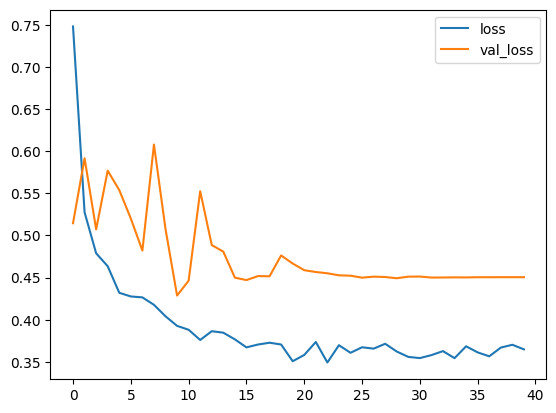

In [50]:
losses = pd.DataFrame(model.history.history)
losses[['loss','val_loss']].plot()

Alttaki kod, eğitim sırasında kaydedilen doğruluk değerlerini (acc ve val_acc) içeren bir DataFrame oluşturur ve bu değerlerin grafiğini çizer.
Bu grafik, eğitim doğruluğunun ve doğrulama doğruluğunun zamanla nasıl değiştiğini gösterir. Amacı, modelin eğitim verilerine ne kadar iyi uyum sağladığını ve aşırı uyum (overfitting) olup olmadığını değerlendirmektir.

<Axes: >

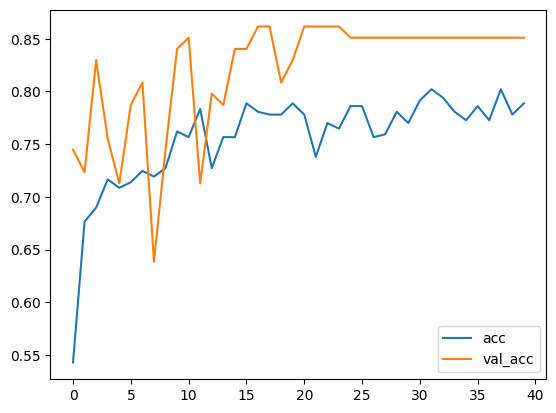

In [51]:
losses[['acc','val_acc']].plot()

Aşağıdaki kod, eğitilmiş modeli kullanarak test veri seti üzerinde tahminler yapar ve modelin doğruluğunu değerlendirir.

In [52]:
y_pred = model.predict(x_test, batch_size=5)

scores = model.evaluate(x_test, y_test)
print ("Model evaluation accuracy: ", round(scores[1]*100),"%")

4/4 [==============================] - 0s 20ms/step - loss: 0.7304 - acc: 0.7350
Model evaluation accuracy:  74 %


Alttaki kod, eğitilmiş modelin tamamını diskte "heart_sounds.h5" adıyla kaydeder.Böylece, model daha sonra tekrar yüklenebilir ve kullanılabilir. Kaydedilen model, aynı mimari ve eğitim süreci ile eğitilmiş modelin bir anlık görüntüsüdür.







In [53]:
model.save('heart_sounds.h5')

Alttaki kod parçası, test veri seti üzerinde modelin tahminlerini gerçekleştirir ve tahmin sonuçlarını yazdırır.

In [54]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)
print ("prediction test return :",y_pred[1], "-", int_to_label[y_pred[1]])

4/4 [==============================] - 0s 19ms/step
prediction test return : 1 - murmur


Altta bulunan fonksiyon, verilen ses dosyasını belirtilen süre ve örnekleme hızıyla yükler. Ardından, MFCC (Mel-Frequency Cepstral Coefficients) özelliklerini çıkarır. Çıkarılan özellikler, tek bir örnekleme özelliği olarak düzenlenir ve bir numpy dizisine dönüştürülür.

Fonksiyonun parametreleri şunlardır:


*   file_path: Ön işleme yapılacak ses dosyasının dosya yolu.
*   duration: Ses dosyasının süresi (varsayılan olarak 10 saniye).
*   sr: Örnekleme hızı (varsayılan olarak 22050).


Fonksiyonun çıktısı, ön işlenmiş ses dosyasının özelliklerini içeren bir numpy dizisidir.

In [55]:
def preprocessing (file_path, duration=10, sr=22050):
  input_length=sr*duration
  process_file=[]
  X, sr = librosa.load(file_path, sr=sr, duration=duration) 
  dur = librosa.get_duration(y=X, sr=sr)
  if (round(dur) < duration):
    y = librosa.util.fix_length(X, input_length)                
  mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sr, n_mfcc=40, n_fft=512,hop_length=2048).T,axis=0)
  feature = np.array(mfccs).reshape([-1,1])
  process_file.append(feature)
  process_file_array = np.asarray(process_file)
  return process_file_array

Aşağıdaki kod, test veri seti üzerinde eğitilmiş modelin tahminlemelerini gerçekleştirir.

In [56]:
y_pred = np.asarray(model.predict(x_test, batch_size=32))
y_pred = np.argmax(y_pred,axis=1)

4/4 [==============================] - 0s 20ms/step


Alttaki kod parçası, sınıflandırma raporunu hesaplar ve yazdırır. Rapor, gerçek sınıf etiketleriyle tahmin edilen sınıf etiketleri arasındaki performans ölçümlerini içerir.

In [57]:
target_names = ["artifact", "murmur","normal"]
print(classification_report(y_test.argmax(axis=1), y_pred, target_names = target_names))

              precision    recall  f1-score   support

    artifact       1.00      0.88      0.93         8
      murmur       0.37      0.59      0.46        22
      normal       0.88      0.76      0.81        87

    accuracy                           0.74       117
   macro avg       0.75      0.74      0.73       117
weighted avg       0.79      0.74      0.76       117



Sonuç ve değerlendirme:

Yukarıdaki sonuç, sınıflandırma raporunun bir örneğidir. Sonuçlar, her bir sınıf için hassasiyet (precision), geri çağırma (recall) ve F1-skor gibi performans ölçümlerini gösterir. Ayrıca, toplam doğruluk ve diğer toplu performans ölçümleri de raporda yer alır.

"artifact" sınıfı için, hassasiyet 1.00 olarak raporlanmıştır. Bu, tahminlerin çoğunun doğru olduğunu gösterir. Geri çağırma (recall) değeri ise 0.88'dir, yani gerçek "artifact" örneklerinin %88'inin doğru bir şekilde tahmin edildiğini gösterir. F1-skor değeri ise 0.93'tür, yani hassasiyet ve geri çağırma değerlerinin birleşik performansını ölçer.

"murmur" sınıfı için, hassasiyet değeri 0.37'dir. Bu, tahminlerin çoğunun yanlış olduğunu gösterir. Geri çağırma değeri 0.59'dur, yani gerçek "murmur" örneklerinin %59'unun doğru bir şekilde tahmin edildiğini gösterir. F1-skor değeri 0.46'dır.

"normal" sınıfı için, hassasiyet değeri 0.88'dir. Bu, tahminlerin çoğunun doğru olduğunu gösterir. Geri çağırma değeri ise 0.76'dır, yani gerçek "normal" örneklerinin %76'sının doğru bir şekilde tahmin edildiğini gösterir. F1-skor değeri 0.81'dir.

Toplam doğruluk değeri, veri setindeki tüm sınıfların doğru bir şekilde tahmin edilme oranını yansıtır. Bu örnekte, toplam doğruluk değeri 0.74'tür, yani tüm örneklerin %74'ü doğru bir şekilde tahmin edilmiştir.

Macro avg, tüm sınıfların performans ölçümlerinin ortalamasını alırken, weighted avg, sınıf sayısına göre ağırlıklı bir ortalama hesaplar. Bu örnekte, macro avg ve weighted avg arasında önemli bir fark yok gibi görünüyor.

Sonuç olarak, modelin performansı sınıflar arasında değişkenlik göstermektedir. "artifact" ve "normal" sınıflarında iyi bir performans sergilerken, "murmur" sınıfında daha düşük bir performans görülmektedir. 